### Introduction to Scientific Python
# LIF Neuron Exercise

*Please execute the cell bellow in order to initialize the notebook environment*

In [2]:
# show figures inline and do not autosave notebook
%matplotlib inline
%autosave 0

import matplotlib.pyplot as plt    # import matplotlib
import numpy as np
import math                        # import basic math functions
import random                      # import basic random number generator functions
from __future__ import division    # enable division by integers

Autosave disabled


## Leaky Integrate-and-Fire Neuron

In this notebook we'll implement a *Leaky Integrate-and-Fire (LIF)* neuron with stochastic pre-synaptic input current, and visualize its key statistical properties.

This neuron model is defined by a *membrane equation* and a *reset condition*:
\begin{align}
&\tau_m\,\frac{d}{dt}\,V(t) = E_{L} - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th}\\
\\
&V(t) = V_{r} &\text{otherwise}\\
\\
\end{align}
where $V(t)$ is the membrane(膜) potential, $\tau_m$ is the membrane time constant, $E_{L}$ is the leak potential, $I(t)$ is the pre-synaptic input current, $V_{th}$ is the firing threshold, and $V_{r}$ is the reset voltage.

We'll extract and visualize the mean, standard deviation and histogram of the following quantities:

* Pre-synaptic input current $I(t)$
* Membrane potential $V(t)$
* Output firing frequency $\lambda(t)$

The problem will be split in several steps:

* Discrete(离散) time integration of $V(t)$ under sinusoidal(正弦函数) pre-synaptic input, and without spikes
* Stochastic pre-synaptic input
* Visualizing ensemble statistics
* Introducing output spikes

**EXERCISE 1**

Initialize the main simulation variables.

**INSTRUCTIONS**
* Modify the code below to print the main simulation parameters

In [3]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


In [89]:
# exercise 1
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


**EXPECTED OUTPUT**

### ODE integration without spikes

The numerical integration of the membrane equation can be performed in discrete time, with a sufficiently small $\Delta t$. We start by writting the membrane equation. without taking the limit $\Delta t \to 0$ in the definition of the time derivative $d/dt\,V(t)$:


\begin{align*}
\tau_m\,\frac{V\left(t+\Delta t\right)-V\left(t\right)}{\Delta t} &= E_{L} - V(t) + R\,I(t)
\end{align*}


The value of membrane potential $V\left(t+\Delta t\right)$ can be expressed in terms of its previous value $V(t)$ by simple algebraic manipulation. For *small enough* values of $\Delta t$ this provides a good approximation of the continuous time integration.

**EXERCISE 2**

Compute the values of $V(t)$ between $t=0$ and $t=0.01$ with $V(0)=E_L$ and pre-synaptic input given by:

$$
I(t)=I_{mean}\left(1+\sin\left(\frac{2 \pi}{0.01}\,t\right)\right)
$$

**INSTRUCTIONS**
* Express $V\left(t+\Delta t\right)$ in terms of $V(t)$
* Initialize the membrane potential variable `v` to `el`
* Loop in the time variable `t` from `t=0` to `t=0.01` with time step `dt`
* At each time step
    * Compute the current value of `i`
    * Update the value of `v`
    * Print `v`
* Use `math.pi` and `math.sin` for evaluating $\pi$ and $\sin(\,)$, respectively

In [3]:
# exercise 2
v = el
for t in np.arange(0,0.01,step=dt):
    i =  i_mean*(1 + math.sin(2*math.pi/0.01*t))
    v = dt/tau * (el - v + r * i) + v
    print(v)

-0.05875
-0.056827768434634406
-0.05454755936753374
-0.05238136075378811
-0.05077756115073311
-0.049988683093196457
-0.04997398050390223
-0.05041410212407606
-0.0508322176632412
-0.050775338345444725


**EXPECTED OUTPUT**

**EXERCISE 3**

Plot the values of $V(t)$ between $t=0$ and $t=t_{max}$ under the same conditions.

**INSTRUCTIONS**
* Update end time of loop to `t_max`
* Replace printing command with plotting command (with keyword `'ko'`)

150


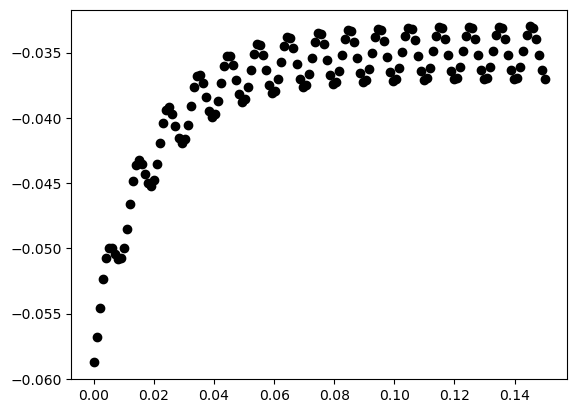

In [4]:
# exercise 3
v = el
v_list = []
for t in np.arange(0,t_max,step=dt):
    i =  i_mean*(1 + math.sin(2*math.pi/0.01*t))
    v = dt/tau * (el - v + r * i) + v
    v_list.append(v)
print(len(v_list))
t_list = np.linspace(0,t_max,num=150)
figure,axis = plt.subplots(1)
axis.plot(t_list,v_list,'ko')
plt.show()

**EXPECTED OUTPUT**
<img src="fig/lif_3.png">

## Stochastic(随机) pre-synaptic(前突触) input

From the standpoint of neurons, their pre-synaptic input is random. We'll improve the pre-synaptic input model by introducing random input with similar statistical properties:

\begin{align}
I(t)=I_{mean}\left(1+0.1\sqrt{\frac{t_{max}}{\Delta t}}\,\xi(t)\right)\qquad\text{with }\xi(t)\sim U(-1,1)
\end{align}
where $U(-1,1)$ is the    uniform distribution(均匀分布)    with support $x\in[-1,1]$.

A random pre-synaptic input $I(t)$ results in a random time course $V(t)$.

**EXERCISE 4**

Plot the values of $V(t)$ between $t=0$ and $t=t_{max}$ with random input $I(t)$.

Initialize the (pseudo) random number generator to a fixed value (`0` for example) in order to obtain the same random input across executions of the code. The function `random.seed()` initializes the random number generator, and `random.random()` generates samples from the uniform distribution between `0` and `1`.

**INSTRUCTIONS**
* Use the function `random.seed()`to initialize the random number generator to `0`
* Use the function `random.random()` to generate the input at each timestep
* Repeat the execution several times to verify that $V(t)$ has a random time course

150


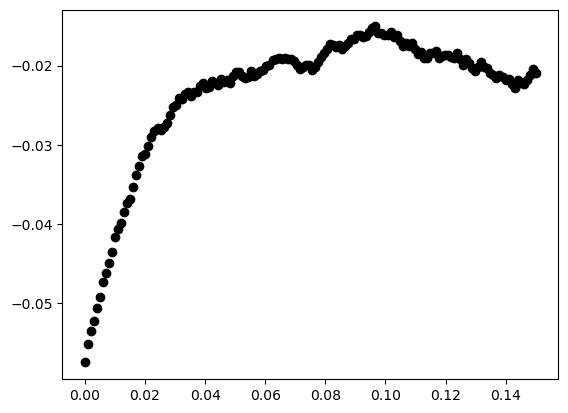

In [5]:
# exercise 4
v = el
v_list = []
random.seed(0)
for t in np.arange(0,t_max,step=dt):
    i =  i_mean*(1 + 0.1*math.sqrt(t_max/dt)*random.random())
    v = dt/tau * (el - v + r * i) + v
    v_list.append(v)
print(len(v_list))
t_list = np.linspace(0,t_max,num=150)
figure,axis = plt.subplots(1)
axis.plot(t_list,v_list,'ko')
plt.show()

**EXPECTED OUTPUT**
<img src="fig/lif_4.png">

## Ensemble statistics

Multiple runs of the previous exercise may give the impression of periodic regularity in the evolution of $V(t)$. We'll collect the sample mean over $N$ realizations of $V(t)$  with random input in order to test such hypothesis. The sample mean, sample variance and sample autocovariance(自协方差) at times $\left\{t_k, t_j\right\}\in[0,t_{max}]$, and for $N$ realizations of $V(t)$ are given by:

\begin{align}
\left\langle V(t_k)\right\rangle &= \frac{1}{N}\sum_{n=1}^N V(t_k)_n & & \text{sample mean}\\
\left\langle (V(t_k)-\left\langle V(t_k)\right\rangle)^2\right\rangle &= \frac{1}{N-1} \sum_{n=1}^N \left(V(t_k)_n-\left\langle V(t_k)\right\rangle\right)^2 & & \text{sample variance} \\
\left\langle \left(V(t_k)-\left\langle V(t_k)\right\rangle\right)\left(V(t_j)-\left\langle V(t_j)\right\rangle\right)\right\rangle
&= \frac{1}{N-1} \sum_{n=1}^N \left(V(t_k)_n-\left\langle V(t_k)\right\rangle\right)\left(V(t_j)_n-\left\langle V(t_j)\right\rangle\right) & & \text{sample autocovariance}
\end{align}

**EXERCISE 5**

Plot multiple realizations of $V(t)$.

**INSTRUCTIONS**
* Create a list to store the value of $V(t)$ for each realization.
* At each timestep loop over `N=50` realizations of random input
* Plot the realizations at each time step with keyword `'kx'` and parameter `alpha=0.1`

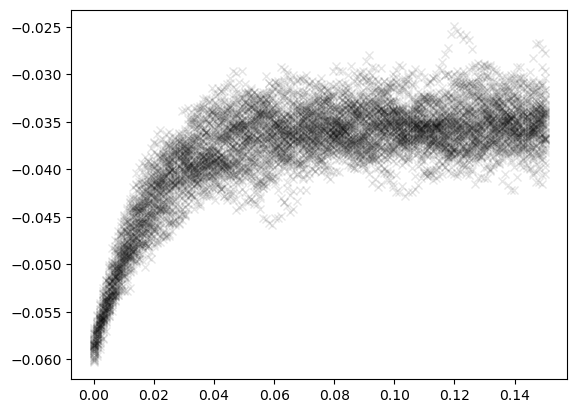

In [6]:
# exercise 5
num_t_points = int(t_max/dt)
v_list = np.zeros((50,num_t_points))
for j in range(50):
    v =  el
    random.seed(0)
    for t in np.arange(0,t_max,step=dt):
        i =  i_mean*(1 + 0.1*math.sqrt(t_max/dt)*np.random.normal(scale=0.5))
        v = dt/tau * (el - v + r * i) + v 
        v_list[j][int(t/dt)] = v

    
t_list = np.linspace(0,t_max,num=150)
figure,axis = plt.subplots(1)
for i in range(50):
    axis.plot(t_list,v_list[i],'kx',alpha=0.1)
plt.show() 

**EXPECTED OUTPUT**
<img src="fig/lif_5.png">

**EXERCISE 6**

Plot the sample mean $\left\langle V(t)\right\rangle$ over `N=50` realizations.

**INSTRUCTIONS**
* Plot the sample mean at each timestep with keyword `'m.'` and parameter `alpha=0.5`

(150,)


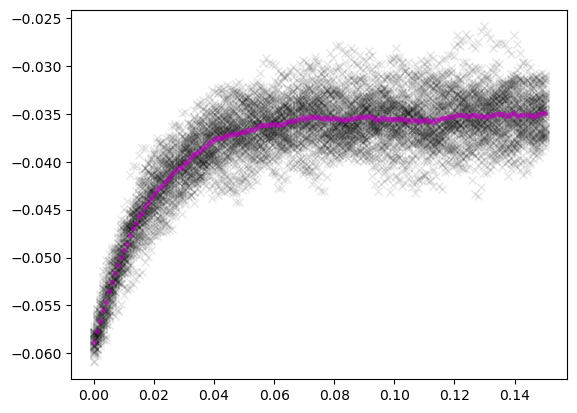

In [7]:
# exercise 6
num_t_points = int(t_max/dt)
v_list = np.zeros((50,num_t_points))
for j in range(50):
    v =  el
    random.seed(0)
    for t in np.arange(0,t_max,step=dt):
        i =  i_mean*(1 + 0.1*math.sqrt(t_max/dt)*np.random.normal(scale=0.5))
        v = dt/tau * (el - v + r * i) + v 
        v_list[j][int(t/dt)] = v

v_mean = np.average(v_list,axis=0)
print(v_mean.shape)
t_list = np.linspace(0,t_max,num=150)
figure,axis = plt.subplots(1)
for i in range(50):
    axis.plot(t_list,v_list[i],'kx',alpha=0.1)
axis.plot(t_list,v_mean,'m.',alpha=0.5)
plt.show() 

**EXPECTED OUTPUT**
<img src="fig/lif_6.png">

**EXERCISE 7**

Add sample standard deviation $\sigma(t_k)\equiv\sqrt{\text{Var}\left(t_k\right)}$ to the plot.

**INSTRUCTIONS**
* After collecting the sample mean, iterate a second time to compute the sample variance $\sigma(t_k)$
* Plot $\left\langle V(t)\right\rangle\pm\sigma(t_k)$ with keyword `'m.'` and parameter `alpha=0.5`.

(150,)


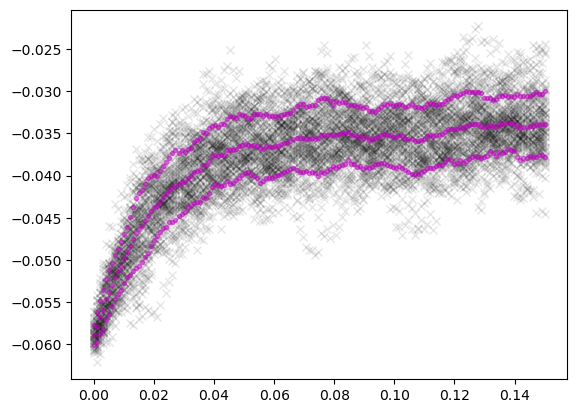

In [8]:
# exercise 7
num_t_points = int(t_max/dt)
v_list = np.zeros((50,num_t_points))
for j in range(50):
    v =  el
    random.seed(0)
    for t in np.arange(0,t_max,step=dt):
        i =  i_mean*(1 + 0.1*math.sqrt(t_max/dt)*np.random.normal(scale=0.8))
        v = dt/tau * (el - v + r * i) + v 
        v_list[j][int(t/dt)] = v

v_mean = np.average(v_list,axis=0)
v_std = np.sqrt(np.var(v_list,axis=0,ddof=1))
#方差还是标准差差很多啊，要对符合数据的数量级的话，还是得使用标准差，否者，在小数的时候，使用方差直接看不出对均值的影响
print(v_std.shape)
t_list = np.linspace(0,t_max,num=150)
figure,axis = plt.subplots(1)
for i in range(50):
    axis.plot(t_list,v_list[i],'kx',alpha=0.1)
axis.plot(t_list,v_mean,'m.',alpha=0.5)
axis.plot(t_list,v_mean-v_std,'m.',alpha=0.5)
axis.plot(t_list,v_mean+v_std,'m.',alpha=0.5)

plt.show() 

**EXPECTED OUTPUT**
<img src="fig/lif_7.png">

Another important statistic is the sample histogram(直方图) at time $t_k\in[0,t_{max}]$, which for $N$ realizations $V\left(t_k\right)$ and $J$ bins is given by:
 
\begin{align}
N = \sum_{j=1}^{J} m_j
\end{align}

where $m_j$ is a function that counts the number of samples $V\left(t_k\right)$ that fall into bin $j$.

**EXERCISE 8**

Plot an histogram of $J=50$ bins of $V(t)$ for $t=t_{max}/10$ and $t=t_{max}$ for $N=10000$ realizations.

The function `plt.hist(data, nbins)` plots an histogram of `nbins` bins of the list 'data' and returns the lists `pdf`, `bins`, `patches`.

`pdf, bins, patches = plt.hist(data, bins)`

The parameters `histtype='stepfilled'` and `linewidth=0` may improve the plots.

**INSTRUCTIONS**
* Plot the 1st histogram after running up to $t=t_{max}/10$
* Plot the 2nd histogram at $t=t_{max}$
* Add labels to identify the time of each histogram
* Plot each histogram with parameters `histtype='stepfilled'` and `linewidth=0`

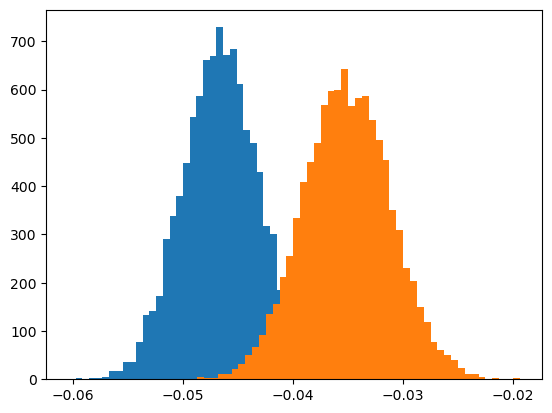

In [9]:
# exercise 8
num_t_points = int(t_max/dt)
v_list = np.zeros((10000,num_t_points))
for j in range(10000):
    v =  el
    random.seed(0)
    for t in np.arange(0,t_max,step=dt):
        i =  i_mean*(1 + 0.1*math.sqrt(t_max/dt)*np.random.normal(scale=0.8))
        v = dt/tau * (el - v + r * i) + v 
        v_list[j][int(t/dt)] = v
        
v_1_max = v_list[:,int(0.1*t_max/dt-1)]
v_max = v_list[:,int(t_max/dt-1)]
plt.hist(v_1_max,50,histtype='stepfilled',linewidth=0)
plt.hist(v_max,50,histtype='stepfilled',linewidth=0)
plt.show()

**EXPECTED OUTPUT**
<img src="fig/lif_8.png">

## Output Spikes

Introduce the *reset condition*: $V(t) = V_{r} \text{if }\quad V(t)\geq V_{th}$

**EXERCISE 9**

Insert the reset condition, and collect the spike times of each realization in a dictionary variable `spikes`, with $N=500$.

**INSTRUCTIONS**
* Reset $V(t)$ to $V_r$ if $V(t)\geq V_{th}$ and collect the spike time
* Plot each realization with keyword `'kx'` and parameter `alpha=0.03`
* Plot the sample mean with keyword `'m.'` and parameter `alpha=0.5`
* Create a new figure and plot the spike times with keyword `'k|'` and parameter `alpha=0.2`
* Create a new figure and plot and the mean spiking activity

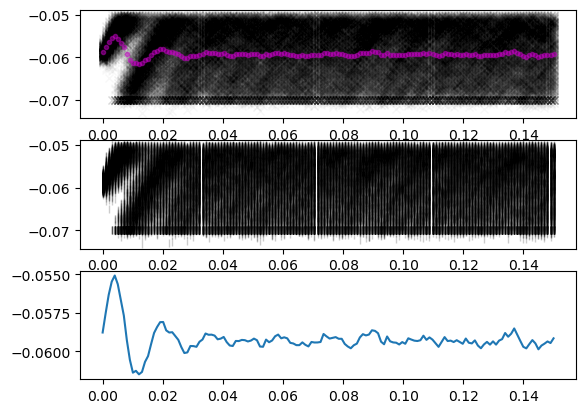

In [10]:
# exercise 9
num_t_points = int(t_max/dt)
v_list = np.zeros((500,num_t_points))
for j in range(500):
    v =  el
    random.seed(0)
    for t in np.arange(0,t_max,step=dt):
        i =  i_mean*(1 + 0.1*math.sqrt(t_max/dt)*np.random.normal(scale=0.8))
        v = dt/tau * (el - v + r * i) + v 
        if v >= vth:
            v = vr
        v_list[j][int(t/dt)] = v

v_mean = np.average(v_list,axis=0)

t_list = np.linspace(0,t_max,num=150)
figure,(axis,axis2,axis3) = plt.subplots(3,1)
for i in range(500):
    axis.plot(t_list,v_list[i],'kx',alpha=0.03)
axis.plot(t_list,v_mean,'m.',alpha=0.5)

for i in range(500):
    axis2.plot(t_list,v_list[i],'k|',alpha=0.2)
# figure3,axis3 = plt.subplots(1)
axis3.plot(t_list,v_mean)
plt.show()

**EXPECTED OUTPUT**
<img src="fig/lif_9a.png">
<img src="fig/lif_9b.png">

**EXERCISE 10**

Investigate the effect of refractory period(不应期) $t_{ref}$ on the evolution of output rate $\lambda(t)$.

**INSTRUCTIONS**
* Add refractory period $t_{ref}=10$ ms after each spike, during which $V(t)$ is clamped to(被钳位到) $V_r$
* Experiment increasingly higher values of refractory period $t_{ref}$

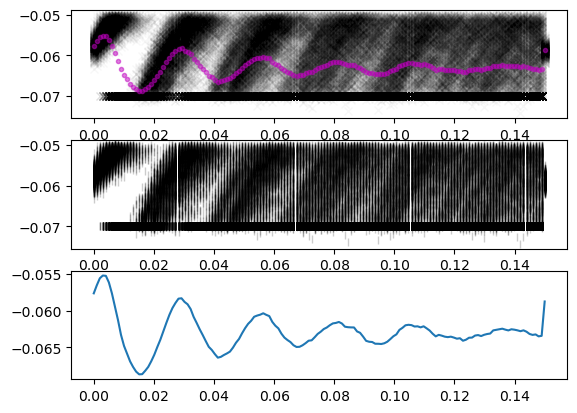

In [26]:
# exercise 10
num_t_points = int(t_max/dt)
v_list = np.zeros((500,num_t_points))
for j in range(500):
    v =  el
    random.seed(0)
    t_st_re = t_max
    for t in np.arange(0,t_max,step=dt):
        i =  i_mean*(1 + 0.1*math.sqrt(t_max/dt)*np.random.normal(scale=0.8))
        v = dt/tau * (el - v + r * i) + v 
        if v >= vth:
            v = vr
            t_st_re = t
        if abs(t - t_st_re) <= 10*dt:
            v = vr
        v_list[j][int(t/dt-1)] = v

v_mean = np.average(v_list,axis=0)

t_list = np.linspace(0,t_max,num=num_t_points)
figure,(axis,axis2,axis3) = plt.subplots(3,1)
for i in range(500):
    axis.plot(t_list,v_list[i],'kx',alpha=0.03)
axis.plot(t_list,v_mean,'m.',alpha=0.5)

for i in range(500):
    axis2.plot(t_list,v_list[i],'k|',alpha=0.2)
# # figure3,axis3 = plt.subplots(1)
axis3.plot(t_list,v_mean)
plt.show()

**EXPECTED OUTPUT**
<img src="fig/lif_10a.png">
<img src="fig/lif_10b.png">

**EXERCISE 11**

Below is a proposed implementation for Exercise 7 from above. Rewrite this code, but break it up into functions. Specifically, write and use function to:
* `I(n)`: returns the current, $I(t)$, at a given time $t$, a list of $n$ floats
* `mean(x)`: returns the mean of `x`, a list of floats
* `std(x)`: returns the standard deviation of `x`, a list of floats
* `ode_step(v, i)`: returns the voltage at the next time step, $V(t+\Delta t)$, given the voltage at the current time step, $V(t)$, and the current, $I(t)$, all lists of floats

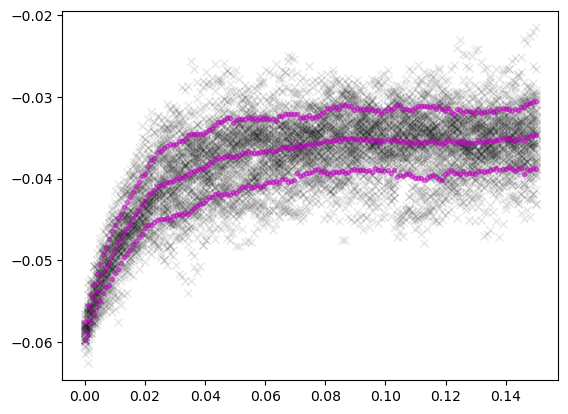

In [15]:
# exercise 11
def I(n):
    i = i_mean*(1 + 0.1*math.sqrt(t_max/dt)*np.random.normal(scale=0.8,size=n))
    return i

def ode_step(v,i):   
    #这里是使用的广播机制，直接将v这一个标量直接拓展成与i相同的向量,故可以直接使用exercise7中的表达式直接进行计算
    v = dt/tau * (el - v + r * i) + v 
    return v 


n = 50
v_list = np.zeros((n,num_t_points))
v = el
for t in np.arange(0,t_max,step=dt):
    i = I(n)
    v = ode_step(v,i)
    v_list[:,int(t/dt)] = v

    
    
v_mean = np.average(v_list,axis=0)
v_std = np.sqrt(np.var(v_list,axis=0,ddof=1))
    
t_list = np.linspace(0,t_max,num=150)
figure,axis = plt.subplots(1)
for i in range(50):
    axis.plot(t_list,v_list[i],'kx',alpha=0.1)
axis.plot(t_list,v_mean,'m.',alpha=0.5)
axis.plot(t_list,v_mean-v_std,'m.',alpha=0.5)
axis.plot(t_list,v_mean+v_std,'m.',alpha=0.5)

plt.show()  

**EXPECTED OUTPUT**
<img src="fig/lif_11.png">

**EXERCISE 12**

Rewrite the code from Exercise 11, but now use the tools from NumPy. For example:
* Use `np.array` instead of Python list for voltage, $V(t)$, and time, $t$
* Use the NumPy functions for statistical function, (e.g. `np.mean`) and mathematical (e.g. `np.sqrt`) operations
* Plot mean $\pm$ std using `plt.fill_between` with parameters `color='m'` and `alpha=0.5`

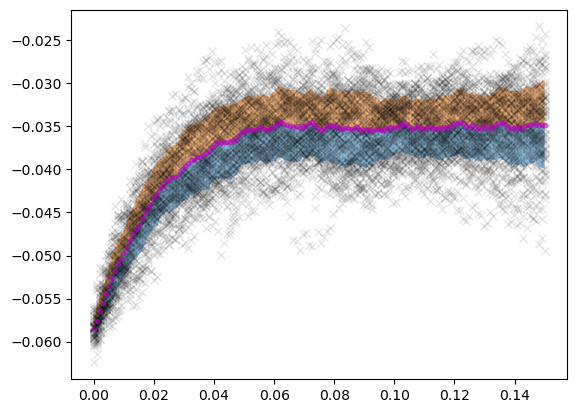

In [18]:
# exercise 12
def I(n):
    i = i_mean*(1 + 0.1*math.sqrt(t_max/dt)*np.random.normal(scale=0.8,size=n))
    return i

def ode_step(v,i):   
    #这里是使用的广播机制，直接将v这一个标量直接拓展成与i相同的向量,故可以直接使用exercise7中的表达式直接进行计算
    v = dt/tau * (el - v + r * i) + v 
    return v 


n = 50
v_list = np.zeros((n,num_t_points))
v = el
for t in np.arange(0,t_max,step=dt):
    i = I(n)
    v = ode_step(v,i)
    v_list[:,int(t/dt)] = v

    
    
v_mean = np.average(v_list,axis=0)
v_std = np.sqrt(np.var(v_list,axis=0,ddof=1))
    
t_list = np.linspace(0,t_max,num=150)
figure,axis = plt.subplots(1)
for i in range(50):
    axis.plot(t_list,v_list[i],'kx',alpha=0.1)
axis.plot(t_list,v_mean,'m.',alpha=0.5)
# axis.plot(t_list,v_mean-v_std,'m.',alpha=0.5)
# axis.plot(t_list,v_mean+v_std,'m.',alpha=0.5)
plt.fill_between(t_list,v_mean-v_std,y2=v_mean,alpha=0.5)
plt.fill_between(t_list,v_mean+v_std,y2=v_mean,alpha=0.5)

plt.show() 

**EXPECTED OUTPUT**
<img src="fig/lif_12.png">

**EXERCISE 13**

**Stretch exercise: this problem is open-ended and will take some extra thought on your part**

Extend your solution from Exercise 9 to model a simple network. In Exercise 9 you modeled an ensemble of spiking neurons that evolved independently of each other. The only step you need to turn this into a network is to allow spikes from one neuron to influece the voltage of other neurons. One simple way of achieve this provide a "kick" to the voltage of "post-synaptic" neurons whenever a "post-synaptic" neuron spikes. The size of this kick represent the strength of the synapses between the neurons. Remember to include both positive and negative "synapses" so that your network activity does not explode!